In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [126]:
df = pd.read_csv("test_cluster.csv", sep=';', encoding_errors='ignore')
print(df)

       age gender city_type  full_mob  ml_balance  cl_balance_0m  \
0       71    NaN      <100       103         0.0            0.0   
1       49    NaN      Mega        81         0.0            0.0   
2       56    NaN      Mega        81         0.0            0.0   
3       47    NaN      Mega        81         0.0            0.0   
4       74    NaN      Mega        81         0.0            0.0   
...    ...    ...       ...       ...         ...            ...   
49995   57      F      <100        97         0.0            0.0   
49996   58      F      Mega        34         0.0            0.0   
49997   34      M       1M+        21         0.0            0.0   
49998   43      M      <100        52         0.0            0.0   
49999   32      F      <100         5         0.0            0.0   

       loan_balance_0m  td_balance_0m  casa_balance_0m  dc_trx_cnt  ...  \
0                 0.00            0.0           0.0000           0  ...   
1                 0.00           

nbi                    1.000000
avg_casa_balance_1Y    0.776348
min_casa_balance_1q    0.775174
casa_balance_0m        0.769899
max_casa_balance_1q    0.769648
avg_td_balance_1Y      0.602703
max_td_balance_1q      0.577806
td_balance_0m          0.574840
min_td_balance_1q      0.555419
avg_cl_balance_1Y      0.389777
max_cl_balance_1q      0.384242
cl_balance_0m          0.378223
min_cl_balance_1q      0.376634
max_loan_balance_1q    0.376067
loan_balance_0m        0.369049
min_loan_balance_1q    0.362321
avg_loan_balance_1Y    0.361682
dc_trx_sum             0.263218
full_mob               0.110472
ml_balance             0.092858
Avg_trx                0.086635
age                    0.061660
dc_trx_cnt             0.057233
loan_to_deposit        0.038705
income                 0.026677
avgtrx_to_balance      0.003607
Name: nbi, dtype: float64


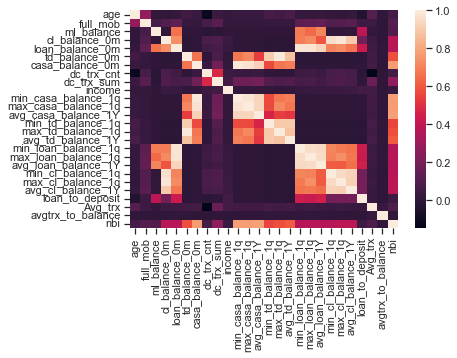

In [127]:
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
print(corr['nbi'].sort_values(ascending=False))

In [128]:
print(df.groupby(['gender']).size())

gender
F    23874
M    25403
dtype: int64


/Users/ivan/code_projects/nashdomparser/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

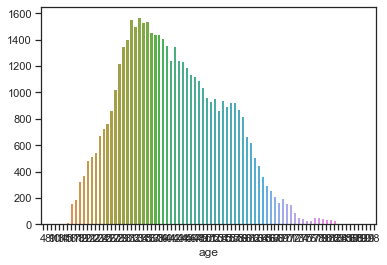

In [137]:
ages = df.groupby(['age']).size()
sns.barplot(ages.index, ages.values)

In [199]:
income_loan = df[(1 < df.income) & (df.income < df.income.quantile(.99)) & (df.loan_balance_0m > 0)]
income_loan = income_loan.sort_values(['income'], ascending=True)
income_loan_mean = income_loan.rolling(100).mean()
income_loan_mean = income_loan_mean.dropna(subset=['income'])
income_loan_mean = income_loan_mean.loc[:, ['income', 'nbi', 'loan_balance_0m']]
print(income_loan_mean)

             income           nbi  loan_balance_0m
31442    6259.68280  15973.694585      135855.7670
15341    6370.76350  15894.890076      134293.2833
8493     6482.02400  15887.888738      134035.1112
42220    6593.46745  15857.943774      133465.2903
10626    6704.97625  15941.474977      133748.3290
...             ...           ...              ...
23712  193705.42865           NaN      878893.7198
6509   194014.93815           NaN      878888.2838
4581   194335.10815           NaN      870096.6795
45128  194656.34815           NaN      870854.0848
12649  194982.10125           NaN      874393.9487

[6051 rows x 3 columns]


/var/folders/cv/0vr6f8f11q5g1b73z5rskn140000gn/T/ipykernel_351/3904327232.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['city_type', 'gender'], dtype='object')
  income_loan_mean = income_loan.rolling(100).mean()


[None]

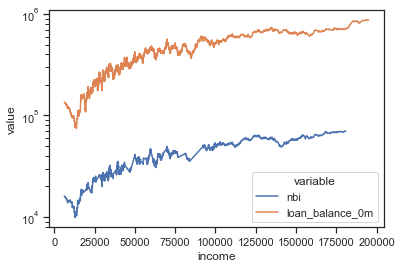

In [204]:
plt = sns.lineplot(x='income', y='value', hue='variable',
             data=pd.melt(income_loan_mean, ['income']))
plt.set(yscale='log')

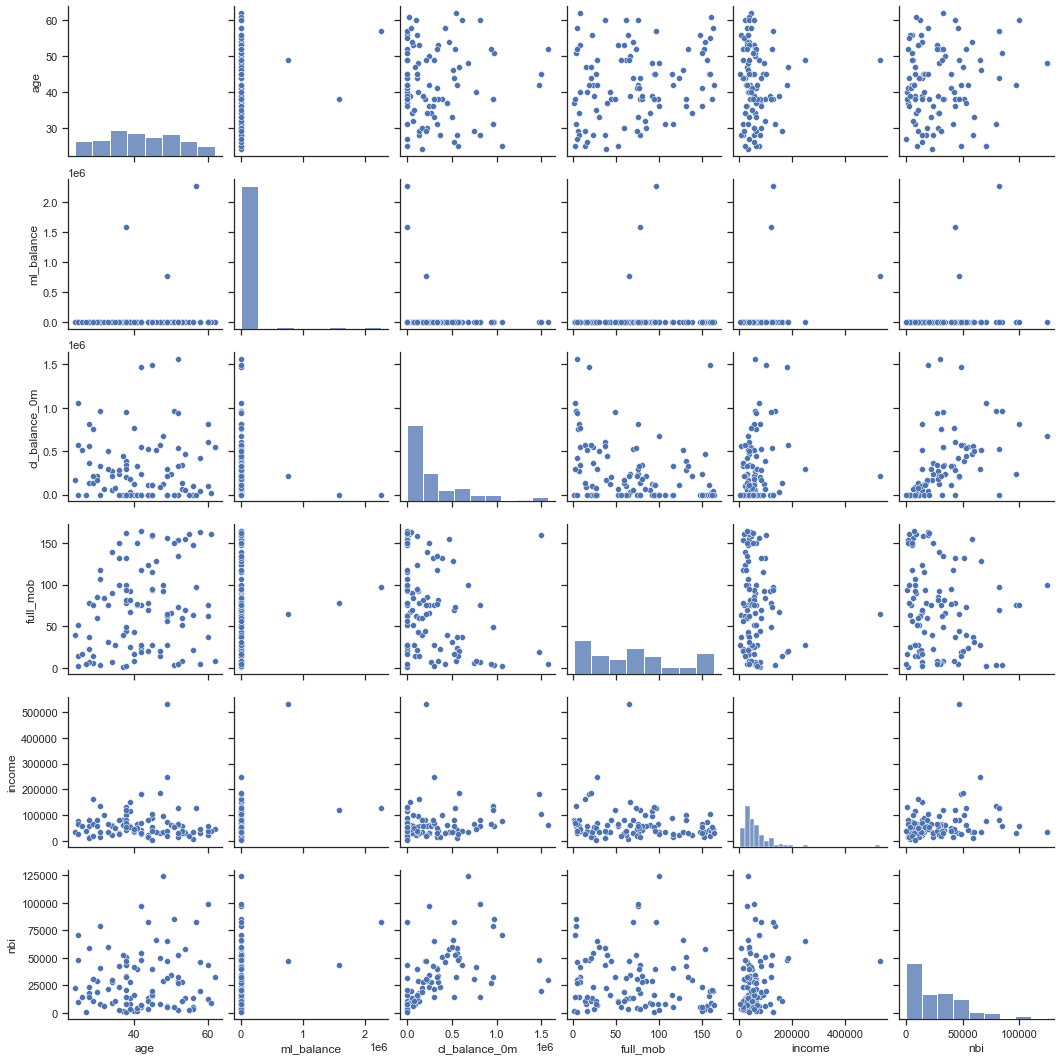

In [119]:
df = df.query('`income` != 0')
df = df.loc[:, significant]
df = df.loc[(df!=0).any(axis=1)]
df = df.sample(n = 100)
sns.set_theme(style="ticks")
sns.pairplot(df)